## Import packages

In [186]:
import numpy as np
from imutils.object_detection import non_max_suppression
import cv2
import matplotlib.pyplot as plt

## Function declaration

Jupyter Notebook 및 Google Colab에서 이미지를 표시할 수 있도록 Function으로 정의

In [2]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [217]:
def template_matched_roi(img, template_img, threshold=0.9):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
    (t_height, t_width) = template_img.shape[:2]
    
    result = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)
    
    (yCoords, xCoords) = np.where(result >= threshold)
    
    roi_list = []

    for (x, y) in zip(xCoords, yCoords):
        roi_list.append((x, y, x + t_width, y + t_height))
    
    roi_array = non_max_suppression(np.array(roi_list))
    print("matched count : [{}]".format(len(roi_array)))
    
    return roi_array

## Load Image

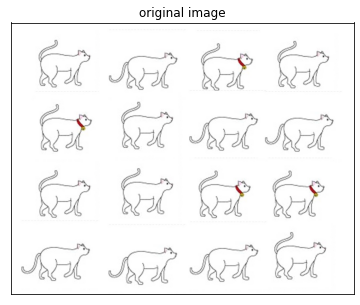

In [220]:
cv2_image = cv2.imread('asset/images/cats.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

template 이미지를 불러옵니다.

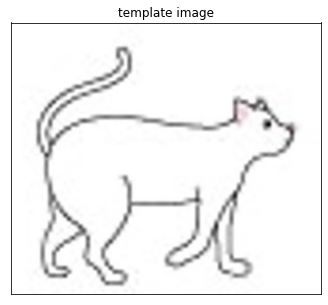

In [221]:
template_image = cv2.imread('asset/images/cat_template.jpg', cv2.IMREAD_COLOR)
img_show('template image', template_image)

In [222]:
roi_array = template_matched_roi(cv2_image, template_image)

matched count : [6]


In [225]:
vis = cv2_image.copy()

# loop over the final bounding boxes
for (x1, y1, x2, y2) in roi_array:
    # draw the bounding box on the image
    cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 3)

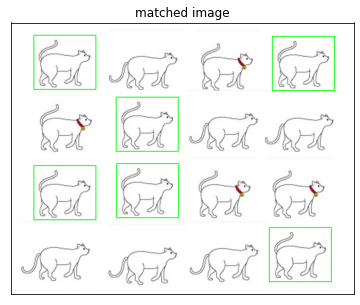

In [226]:
img_show(['matched image'], [vis])

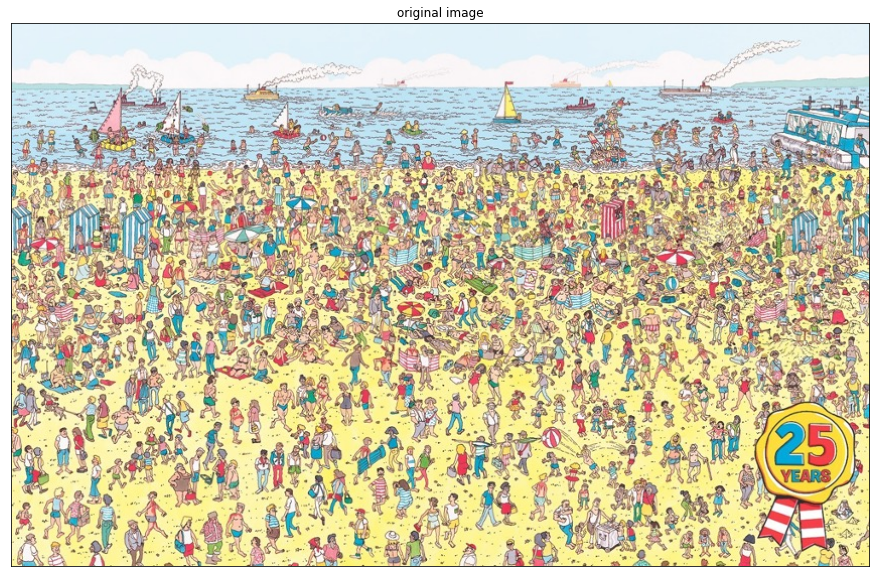

In [207]:
cv2_image = cv2.imread('asset/images/find_wally.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image, figsize=(16,10))

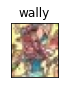

In [209]:
template_image = cv2.imread('asset/images/wally.jpg', cv2.IMREAD_COLOR)
img_show('wally', [template_image], figsize=(2,1))

In [210]:
gray = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

In [211]:
result = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(result)

In [212]:
(startX, startY) = maxLoc
endX = startX + template_image.shape[1]
endY = startY + template_image.shape[0]

In [213]:
vis = cv2_image.copy()
vis = cv2.rectangle(vis, (startX, startY), (endX, endY), (0, 255, 0),3)

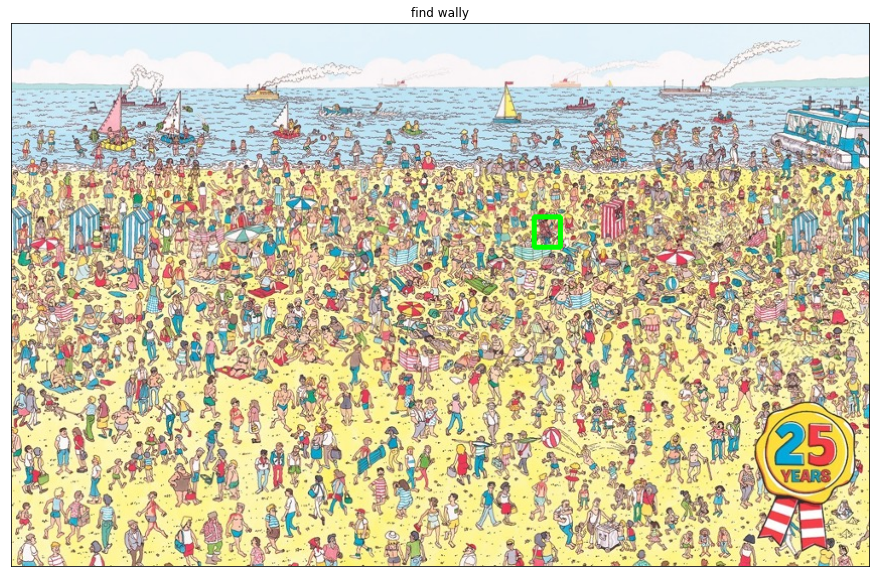

In [216]:
img_show('find wally', vis, figsize=(16, 10))